# 🧺 Customer Segmentation for Meesho

## 🎯 Objective:
Segment customers based on their shopping behavior (preferred category, purchase frequency, loyalty score, region, etc.) and generate actionable recommendations for Meesho's marketing and business teams.

## 📦 Dataset:
Synthetic data generated to simulate Meesho’s customer base (tier-2/3 focus, ethnic product categories, etc.)

## 🛠️ Tools Used:
Python, pandas, NumPy, scikit-learn (KMeans, PCA), matplotlib, python-pptx

⚠️ Note: This is a simulated business case for learning purposes.


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pptx import Presentation
from pptx.util import Inches


In [6]:
np.random.seed(42)
num_customers = 500

data = {
    "CustomerID": range(1, num_customers + 1),
    "Gender": np.random.choice(["Male", "Female"], num_customers),
    "Age": np.random.randint(18, 55, num_customers),
    "Region": np.random.choice(["Tier-1", "Tier-2", "Tier-3"], num_customers, p=[0.2, 0.5, 0.3]),
    "PreferredCategory": np.random.choice(["Saree", "Kurti", "Footwear", "Jewelry", "Home Decor"], num_customers),
    "AnnualIncome": np.random.randint(100000, 800000, num_customers),
    "PurchaseFrequency": np.random.randint(1, 30, num_customers),  # per month
    "AvgOrderValue": np.random.randint(100, 2000, num_customers),
    "LoyaltyScore": np.round(np.random.uniform(0, 1, num_customers), 2),
    "ReturnRate": np.round(np.random.uniform(0.0, 0.4, num_customers), 2),
    "State": np.random.choice(["UP", "MH", "TN", "WB", "RJ"], num_customers)
}

df = pd.DataFrame(data)
df.head()


,CustomerID,Gender,Age,Region,PreferredCategory,AnnualIncome,PurchaseFrequency,AvgOrderValue,LoyaltyScore,ReturnRate,State
0,1,Male,38,Tier-2,Jewelry,640302,22,1450,0.15,0.33,WB
1,2,Female,49,Tier-2,Jewelry,192578,24,1841,0.46,0.22,MH
2,3,Male,40,Tier-3,Kurti,789115,13,1186,0.98,0.39,TN
3,4,Male,50,Tier-2,Jewelry,664678,12,1196,0.48,0.02,WB
4,5,Male,20,Tier-3,Footwear,385855,26,862,0.86,0.20,TN


In [7]:
df_encoded = df.copy()
df_encoded["Gender"] = df_encoded["Gender"].map({"Male": 0, "Female": 1})
df_encoded["Region"] = df_encoded["Region"].map({"Tier-1": 0, "Tier-2": 1, "Tier-3": 2})
df_encoded["PreferredCategory"] = df_encoded["PreferredCategory"].map({
    "Saree": 0, "Kurti": 1, "Footwear": 2, "Jewelry": 3, "Home Decor": 4
})
df_encoded["State"] = df_encoded["State"].map({"UP": 0, "MH": 1, "TN": 2, "WB": 3, "RJ": 4})


In [13]:
from sklearn.preprocessing import StandardScaler

features = [
    "Gender", "Age", "Region", "PreferredCategory", "AnnualIncome",
    "PurchaseFrequency", "AvgOrderValue", "LoyaltyScore", "ReturnRate", "State"
]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[features])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)






C:\Users\kajal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


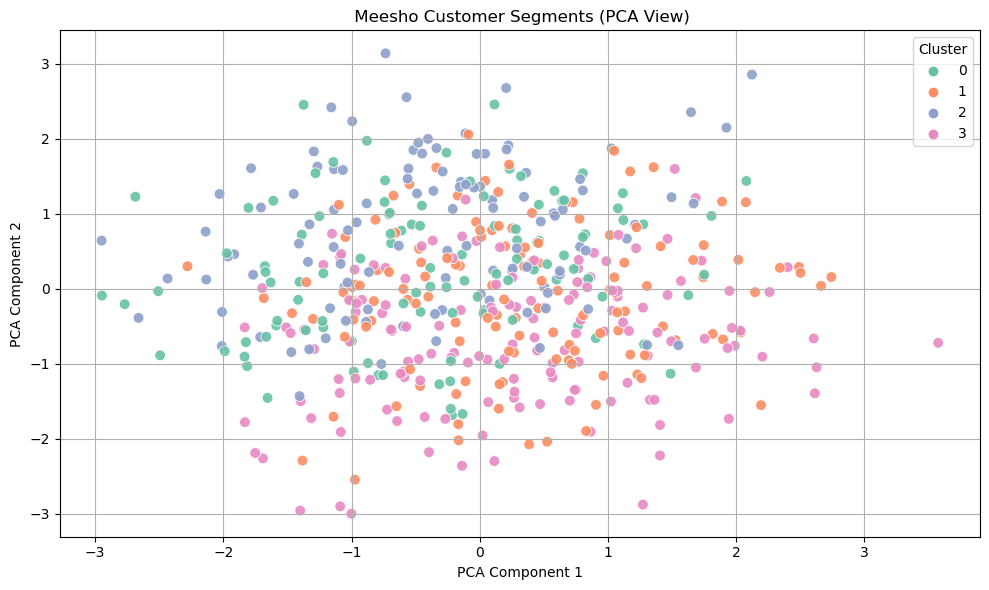

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 2D projection using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add PCA data to main dataframe
df["PCA1"] = pca_components[:, 0]
df["PCA2"] = pca_components[:, 1]

# Visualize clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster',
    data=df, palette='Set2', s=60, alpha=0.9
)
plt.title(" Meesho Customer Segments (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
cluster_summary = df.groupby('Cluster').agg({
    'Gender': lambda x: x.value_counts(normalize=True).to_dict(),
    'Age': 'mean',
    'Region': lambda x: x.value_counts(normalize=True).to_dict(),
    'PreferredCategory': lambda x: x.value_counts(normalize=True).to_dict(),
    'AnnualIncome': 'mean',
    'PurchaseFrequency': 'mean',
    'AvgOrderValue': 'mean',
    'LoyaltyScore': 'mean',
    'ReturnRate': 'mean'
}).round(2)

cluster_summary


,Gender,Age,Region,PreferredCategory,AnnualIncome,PurchaseFrequency,AvgOrderValue,LoyaltyScore,ReturnRate
Cluster,,,,,,,,,
0,{'Female': 1.0},36.20,"{'Tier-2': 0.48598130841121495, 'Tier-3': 0.34...","{'Home Decor': 0.3177570093457944, 'Jewelry': ...",488169.95,16.27,1055.25,0.61,0.10
1,{'Male': 1.0},45.05,"{'Tier-2': 0.5, 'Tier-1': 0.25757575757575757,...","{'Kurti': 0.24242424242424243, 'Jewelry': 0.22...",469023.41,15.48,1074.22,0.47,0.22
2,{'Male': 1.0},26.96,"{'Tier-3': 0.4732142857142857, 'Tier-2': 0.428...","{'Kurti': 0.23214285714285715, 'Jewelry': 0.23...",436999.41,15.67,1155.83,0.52,0.17
3,{'Female': 1.0},36.54,"{'Tier-2': 0.5033557046979866, 'Tier-3': 0.275...","{'Saree': 0.2684563758389262, 'Footwear': 0.23...",429901.05,14.25,1147.53,0.45,0.28


In [10]:
prs = Presentation()
prs.slide_width = Inches(13.33)
prs.slide_height = Inches(7.5)

for cluster_id, row in cluster_summary.iterrows():
    slide = prs.slides.add_slide(prs.slide_layouts[5])
    title = slide.shapes.title
    title.text = f"Cluster {cluster_id} Profile"

    top_category = max(row['PreferredCategory'], key=row['PreferredCategory'].get)
    
    if top_category == 'Saree':
        recommendation = "Promote festive saree collections with regional targeting."
    elif top_category == 'Kurti':
        recommendation = "Launch daily-wear kurti bundles for working women."
    elif top_category == 'Footwear':
        recommendation = "Bundle sandals + flats for combo sales."
    elif top_category == 'Jewelry':
        recommendation = "Push festive jewelry via WhatsApp catalogues."
    else:
        recommendation = "Push home décor via seasonal sales."

    content = (
        f"• Gender Ratio         : {row['Gender']}\n"
        f"• Avg Age              : {row['Age']}\n"
        f"• Region Ratio         : {row['Region']}\n"
        f"• Preferred Category   : {row['PreferredCategory']}\n"
        f"• Avg Income           : ₹{row['AnnualIncome']}\n"
        f"• Purchase Frequency   : {row['PurchaseFrequency']}\n"
        f"• Avg Order Value      : ₹{row['AvgOrderValue']}\n"
        f"• Loyalty Score        : {row['LoyaltyScore']}\n"
        f"• Return Rate          : {row['ReturnRate']}\n"
        f"\n📌 Recommendation: {recommendation}"
    )

    textbox = slide.shapes.add_textbox(Inches(1), Inches(1.5), Inches(11), Inches(5.5))
    tf = textbox.text_frame
    tf.text = content

prs.save("customer_segmentation_meesho.pptx")
